In [1]:
import pandas as pd
import matplotlib.pylab as plt
import urllib.request
from urllib.request import urlretrieve
import zipfile
import geopandas as gp

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
rental_url = "https://raw.githubusercontent.com/CUSPcapstones/Digital-Traces-of-Gentrification_\
2018/master/data/nyc_median_historical.csv?token=AIn7gB0W6--IKsmsIaAIXY9IRV0llDWQks5a5JIrwA%3D%3D"

In [3]:
df = pd.read_csv(rental_url, index_col=0)

In [4]:
df.head()

,zipcode,CountyName,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02
0,10025,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3440.0,3440.0,3405.0,3470.0,3402.5,3400.0,3495.0,3500.0,3402.5,3402.5
2,10023,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3750.0,3750.0,3800.0,3700.0,3600.0,3587.5,3700.0,3700.0,3700.0,3550.0
8,10002,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3225.0,3295.0,3295.0,3112.5,2850.0,3100.0,2920.0,3050.0,3050.0,3100.0
10,10467,Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1150.0,1150.0,1175.0,1175.0,1175.0,1175.0,1200.0,1150.0,1295.0,1400.0
13,11226,Kings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1545.0,1650.0,1675.0,1547.5,1499.0,1522.5,1499.5,1499.5,1500.0,1625.0


In [65]:
zip_ref = zipfile.ZipFile("ZIP_CODE.zip", 'r')
zip_ref.extractall()
zip_ref.close()



In [66]:
zipcodes = gp.GeoDataFrame.from_file("ZIP_CODE_040114.shp")


In [6]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/fedhere/choroplethNYC/master/choroplethNYC.py","choroplethNYC.py")

import choroplethNYC as cp

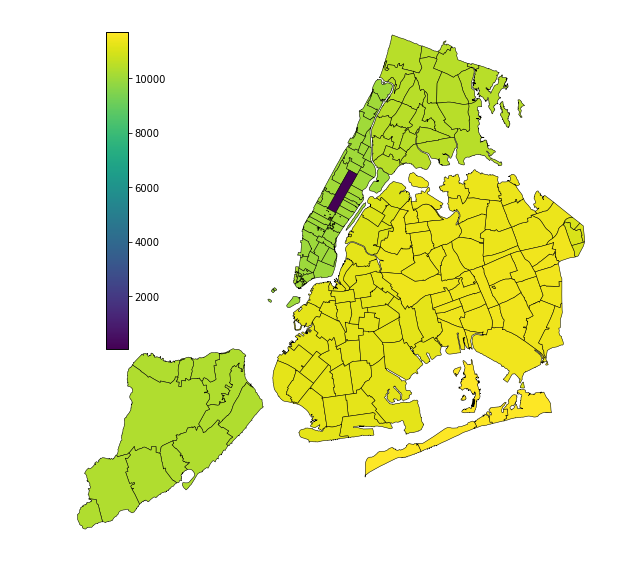

In [74]:
cp.choroplethNYC(zipcodes, column="ZIPCODE", color="k",cmap="viridis", edgecolor="k", lw=0.5);

In [7]:
# imputing values by backfilling the rows. The averages would be similar among zipcodes and not in the year
df = df.T.fillna(method='bfill').T

In [8]:
df.head()

,zipcode,CountyName,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02
0,10025,New York,2575,2575,2575,2575,2575,2575,2575,2575,...,3440,3440,3405,3470,3402.5,3400,3495,3500,3402.5,3402.5
2,10023,New York,3475,3475,3475,3475,3475,3475,3475,3475,...,3750,3750,3800,3700,3600,3587.5,3700,3700,3700,3550
8,10002,New York,2800,2800,2800,2800,2800,2800,2800,2800,...,3225,3295,3295,3112.5,2850,3100,2920,3050,3050,3100
10,10467,Bronx,1150,1150,1150,1150,1150,1150,1150,1150,...,1150,1150,1175,1175,1175,1175,1200,1150,1295,1400
13,11226,Kings,1900,1900,1900,1900,1900,1900,1900,1900,...,1545,1650,1675,1547.5,1499,1522.5,1499.5,1499.5,1500,1625


In [9]:
df_rel = df[['zipcode', 'CountyName', '2010-02', '2018-02']]

In [10]:
# adding a column showing if the zipcode was less than 1 sd compared to the mean
df_rel['2010_below'] = df_rel['2010-02'] < np.mean(df_rel['2010-02']) - (0.5* np.std(df_rel['2010-02']))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [11]:
# adding a column showing if the zipcode was less than 1 sd compared to the mean in 2018
df_rel['2018_above'] = df_rel['2018-02'] >= np.mean(df_rel['2018-02']) + (0.5* np.std(df_rel['2018-02']))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [12]:
df_rel.head(10)

,zipcode,CountyName,2010-02,2018-02,2010_below,2018_above
0,10025,New York,2575,3402.5,False,True
2,10023,New York,3475,3550,False,True
8,10002,New York,2800,3100,False,False
10,10467,Bronx,1150,1400,True,False
13,11226,Kings,1900,1625,True,False
14,10016,New York,2900,3400,False,True
15,11235,Kings,1400,2375,True,False
20,10009,New York,2599.5,3320,False,True
22,10011,New York,3200,3772.5,False,True
23,10029,New York,2895,3297.5,False,False


In [13]:
# identify zipcodes which were 1 sd below mean in 2010 but greater than mean in 2018
#df_rel['gentrified'] = (df_rel['2010_below'] == True) & (df_rel['2018_above'] == True)

df_rel['gentrified'] = df_rel['2018-02'] - df_rel['2010-02'] > np.std(df['2010-02'])

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
df_rel['change'] = df_rel['2018-02'] - df_rel['2010-02']

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [15]:
df_rel.head()

,zipcode,CountyName,2010-02,2018-02,2010_below,2018_above,gentrified,change
0,10025,New York,2575,3402.5,False,True,False,827.5
2,10023,New York,3475,3550,False,True,False,75
8,10002,New York,2800,3100,False,False,False,300
10,10467,Bronx,1150,1400,True,False,False,250
13,11226,Kings,1900,1625,True,False,False,-275


In [67]:
zipcodes['ZIPCODE'] = pd.to_numeric(zipcodes['ZIPCODE'])

In [125]:
df_geo = pd.merge(df_rel, zipcodes, how = 'outer', right_on = "ZIPCODE", left_on = "zipcode")

In [127]:
df_geo.fillna(value=0, inplace=True)

In [128]:
df_geo.head()

,zipcode,CountyName,2010-02,2018-02,2010_below,2018_above,gentrified,change,ZIPCODE,BLDGZIP,...,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,10025,New York,2575.0,3402.5,False,True,False,827.5,10025.0,0,...,96054.0,1.963104e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((995501.6553063095 232971.115144223, ..."
1,10023,New York,3475.0,3550.0,False,True,False,75.0,10023.0,0,...,62800.0,1.521271e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((986170.3206225634 221389.1589774638,..."
2,10002,New York,2800.0,3100.0,False,False,False,300.0,10002.0,0,...,81305.0,2.628013e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((991339.8703228086 207576.7837151289,..."
3,10467,Bronx,1150.0,1400.0,True,False,False,250.0,10467.0,0,...,97932.0,6.933617e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0,"POLYGON ((1017396.305742651 265444.4701448828,..."
4,11226,Kings,1900.0,1625.0,True,False,False,-275.0,11226.0,0,...,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994821.4729396403 177865.7178093046,..."


In [129]:
df_geo.shape

(263, 21)

In [130]:
df_geo = gp.GeoDataFrame(df_geo)

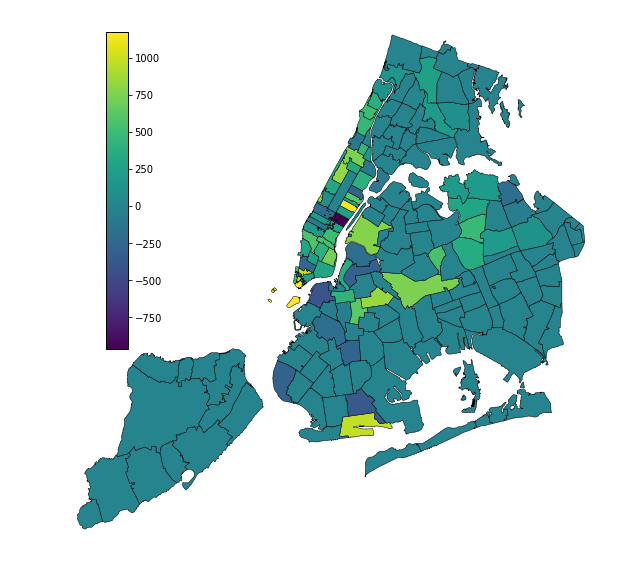

In [134]:
cp.choroplethNYC(df_geo, column="change", color="k",cmap="viridis", edgecolor="k", lw=0.5);

Fig 2: The above figure shows the map of NYC with the color of the zipcode indicating the increase in median income from 2010 to 2018

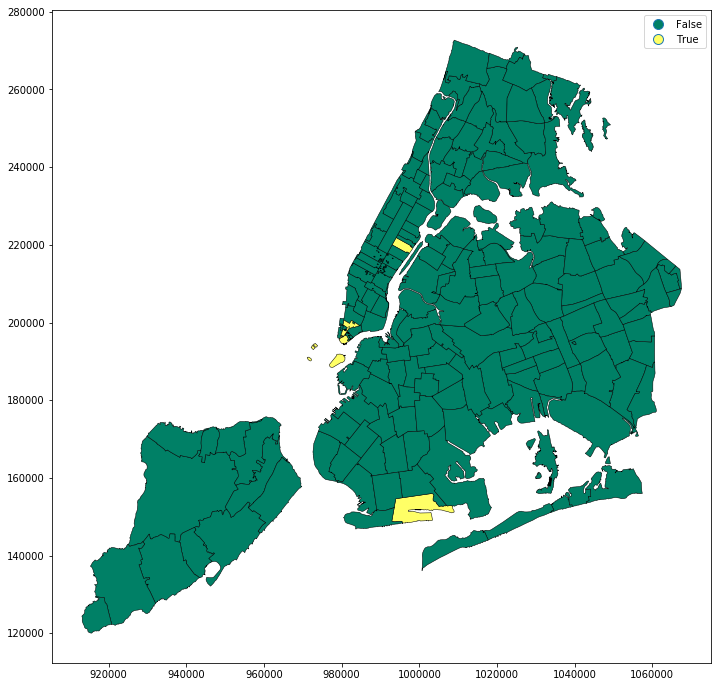

In [148]:
df_geo.plot(column='gentrified', figsize=(20,12), cmap='summer',edgecolor = 'k', lw = 0.5, legend=True)

Fig 3: The above figure shows the map of gentrification between 2010 and 2018

This map does not align with the citylab or other reference maps of gentrification

In [73]:
zipcodes.shape

(263, 13)

In [153]:
citylab = pd.read_csv('citylab.csv')

In [154]:
citylab.head()

,CD Name,PUMA,Community District,2000 Population,2000 Children (age 0-18),2000 Working Age Population (age 19-65),2000 Seniors (age 65+),2000 Employed (age 19-65),2000 Unemployed (age 19-65),2000 Unemployment Rate,...,2014 Restaurants & Bars,Sum of 2002 Mixed-Use,Sum of 2016 Mixed-Use,Sum of 2002 Office,Sum of 2016 Office,Sum of 2002 Standalone Retail,Sum of 2016 Standalone Retail,Change Mixed-Use,Change 2016 Office,Change Standalone Retail
0,"Far Rockaway, Breezy Point & Broad Channel",4114.0,QN14,"103,729","30,452","58,923","14,354","34,879","4,098",10.5%,...,130,194,181,41,37,199.0,204.0,-7%,-10%,3%
1,Howard Beach & Ozone Park,4113.0,QN10,"129,660","34,214","80,727","14,719","50,136","3,760",7.0%,...,229,813,804,66,63,384.0,486.0,-1%,-5%,27%
2,"Jamaica, Hollis & St. Albans",4112.0,QN12,"218,003","62,444","133,034","22,525","82,980","9,244",10.0%,...,257,"1,283","1,339",137,130,680.0,777.0,4%,-5%,14%
3,Richmond Hill & Woodhaven,4111.0,QN09,"140,173","37,571","90,046","12,556","56,058","4,747",7.8%,...,195,"1,169","1,284",85,91,339.0,401.0,10%,7%,18%
4,"Ridgewood, Glendale & Middle Village",4110.0,QN05,"167,870","39,695","106,295","21,880","67,524","5,308",7.3%,...,314,"1,691","1,776",96,92,372.0,412.0,5%,-4%,11%


In [158]:
citylab = citylab.ix[:54]

In [159]:
citylab.tail()

,CD Name,PUMA,Community District,2000 Population,2000 Children (age 0-18),2000 Working Age Population (age 19-65),2000 Seniors (age 65+),2000 Employed (age 19-65),2000 Unemployed (age 19-65),2000 Unemployment Rate,...,2014 Restaurants & Bars,Sum of 2002 Mixed-Use,Sum of 2016 Mixed-Use,Sum of 2002 Office,Sum of 2016 Office,Sum of 2002 Standalone Retail,Sum of 2016 Standalone Retail,Change Mixed-Use,Change 2016 Office,Change Standalone Retail
50,"Belmont, Crotona Park East & East Tremont",3705.0,BX03 & BX06,"140,777","50,608","80,547","9,622","33,254","8,432",20.2%,...,112,610,699,38,47,336.0,321.0,15%,24%,-4%
51,"Pelham Parkway, Morris Park & Laconia",3704.0,BX11,"121,704","29,817","74,266","17,621","44,424","3,583",7.5%,...,55,384,383,83,91,262.0,269.0,0%,10%,3%
52,"Co-op City, Pelham Bay & Schuylerville",3703.0,BX10,"111,738","25,347","67,443","18,948","45,186","2,957",6.1%,...,243,356,367,84,89,302.0,320.0,3%,6%,6%
53,"Wakefield, Williamsbridge & Woodlawn",3702.0,BX12,"139,419","40,749","83,763","14,907","51,680","6,179",10.7%,...,104,457,459,40,52,393.0,380.0,0%,30%,-3%
54,"Riverdale, Fieldston & Kingsbridge",3701.0,BX08,"106,386","26,390","63,238","16,758","39,679","4,031",9.2%,...,152,124,145,29,30,147.0,158.0,17%,3%,7%


In [161]:
citylab.shape

(55, 181)

In [85]:
zip_ref = zipfile.ZipFile("census_tracts.zip", 'r')
zip_ref.extractall()
zip_ref.close()

In [86]:
ct = gp.GeoDataFrame.from_file("geo_export_998a5a6b-f027-47c9-8a94-40ffd378e113.shp")

In [91]:
ct.head()

,puma,boro_ct201,ct2010,ntaname,ntacode,boro_name,shape_leng,shape_area,cdeligibil,boro_code,ctlabel,geometry
0,3903,5000900,000900,West New Brighton-New Brighton-St. George,SI22,Staten Island,7729.016794,2.497010e+06,I,5,9,POLYGON ((-74.07920577013245 40.64343078374567...
1,3808,1009800,009800,Turtle Bay-East Midtown,MN19,Manhattan,5534.199811,1.906016e+06,I,1,98,POLYGON ((-73.96432543478758 40.75638153099091...
2,3808,1010000,010000,Turtle Bay-East Midtown,MN19,Manhattan,5692.168737,1.860938e+06,I,1,100,POLYGON ((-73.96802436915851 40.75957814005282...
3,3807,1010200,010200,Midtown-Midtown South,MN17,Manhattan,5687.802439,1.860993e+06,I,1,102,POLYGON ((-73.97124277307127 40.76093641847906...
4,3807,1010400,010400,Midtown-Midtown South,MN17,Manhattan,5693.036367,1.864600e+06,I,1,104,POLYGON ((-73.97445730550224 40.76229308352487...


In [166]:
ct.shape

(2166, 12)

In [218]:
type(ct['puma'][0])

str

In [187]:
citylab['PUMA'] = citylab['PUMA'].apply(lambda x: str(int(x)))

In [227]:
citylab_geo = pd.merge(citylab, ct,how='inner', left_on = "PUMA", right_on = "puma")

In [228]:
#citylab_geo.fillna(value=0, inplace=True)

In [229]:
citylab_geo.head()

,CD Name,PUMA,Community District,2000 Population,2000 Children (age 0-18),2000 Working Age Population (age 19-65),2000 Seniors (age 65+),2000 Employed (age 19-65),2000 Unemployed (age 19-65),2000 Unemployment Rate,...,ct2010,ntaname,ntacode,boro_name,shape_leng,shape_area,cdeligibil,boro_code,ctlabel,geometry
0,"Far Rockaway, Breezy Point & Broad Channel",4114,QN14,"103,729","30,452","58,923","14,354","34,879","4,098",10.5%,...,092800,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,QN10,Queens,12973.832347,8.206267e+06,I,4,928,POLYGON ((-73.84699487259874 40.57271912813525...
1,"Far Rockaway, Breezy Point & Broad Channel",4114,QN14,"103,729","30,452","58,923","14,354","34,879","4,098",10.5%,...,100801,Far Rockaway-Bayswater,QN15,Queens,15369.007368,6.931019e+06,I,4,1008.01,POLYGON ((-73.75973571099024 40.61015545765209...
2,"Far Rockaway, Breezy Point & Broad Channel",4114,QN14,"103,729","30,452","58,923","14,354","34,879","4,098",10.5%,...,103201,Far Rockaway-Bayswater,QN15,Queens,11041.278077,4.311254e+06,E,4,1032.01,POLYGON ((-73.74692096473989 40.61172649991959...
3,"Far Rockaway, Breezy Point & Broad Channel",4114,QN14,"103,729","30,452","58,923","14,354","34,879","4,098",10.5%,...,107201,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,QN10,Queens,30272.641440,1.475684e+07,I,4,1072.01,POLYGON ((-73.81652681244356 40.61494700965857...
4,"Far Rockaway, Breezy Point & Broad Channel",4114,QN14,"103,729","30,452","58,923","14,354","34,879","4,098",10.5%,...,103202,Far Rockaway-Bayswater,QN15,Queens,11703.308921,7.675665e+06,E,4,1032.02,POLYGON ((-73.74029138976144 40.60459823228099...


In [230]:
citylab_geo.shape

(2166, 193)

In [231]:
citylab_geo.head()

,CD Name,PUMA,Community District,2000 Population,2000 Children (age 0-18),2000 Working Age Population (age 19-65),2000 Seniors (age 65+),2000 Employed (age 19-65),2000 Unemployed (age 19-65),2000 Unemployment Rate,...,ct2010,ntaname,ntacode,boro_name,shape_leng,shape_area,cdeligibil,boro_code,ctlabel,geometry
0,"Far Rockaway, Breezy Point & Broad Channel",4114,QN14,"103,729","30,452","58,923","14,354","34,879","4,098",10.5%,...,092800,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,QN10,Queens,12973.832347,8.206267e+06,I,4,928,POLYGON ((-73.84699487259874 40.57271912813525...
1,"Far Rockaway, Breezy Point & Broad Channel",4114,QN14,"103,729","30,452","58,923","14,354","34,879","4,098",10.5%,...,100801,Far Rockaway-Bayswater,QN15,Queens,15369.007368,6.931019e+06,I,4,1008.01,POLYGON ((-73.75973571099024 40.61015545765209...
2,"Far Rockaway, Breezy Point & Broad Channel",4114,QN14,"103,729","30,452","58,923","14,354","34,879","4,098",10.5%,...,103201,Far Rockaway-Bayswater,QN15,Queens,11041.278077,4.311254e+06,E,4,1032.01,POLYGON ((-73.74692096473989 40.61172649991959...
3,"Far Rockaway, Breezy Point & Broad Channel",4114,QN14,"103,729","30,452","58,923","14,354","34,879","4,098",10.5%,...,107201,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,QN10,Queens,30272.641440,1.475684e+07,I,4,1072.01,POLYGON ((-73.81652681244356 40.61494700965857...
4,"Far Rockaway, Breezy Point & Broad Channel",4114,QN14,"103,729","30,452","58,923","14,354","34,879","4,098",10.5%,...,103202,Far Rockaway-Bayswater,QN15,Queens,11703.308921,7.675665e+06,E,4,1032.02,POLYGON ((-73.74029138976144 40.60459823228099...


In [232]:
citylab_geo.tail()

,CD Name,PUMA,Community District,2000 Population,2000 Children (age 0-18),2000 Working Age Population (age 19-65),2000 Seniors (age 65+),2000 Employed (age 19-65),2000 Unemployed (age 19-65),2000 Unemployment Rate,...,ct2010,ntaname,ntacode,boro_name,shape_leng,shape_area,cdeligibil,boro_code,ctlabel,geometry
2161,"Riverdale, Fieldston & Kingsbridge",3701,BX08,"106,386","26,390","63,238","16,758","39,679","4,031",9.2%,...,028500,Spuyten Duyvil-Kingsbridge,BX29,Bronx,10774.902115,2.883549e+06,E,2,285,POLYGON ((-73.89787887465394 40.89027610124153...
2162,"Riverdale, Fieldston & Kingsbridge",3701,BX08,"106,386","26,390","63,238","16,758","39,679","4,031",9.2%,...,029500,Spuyten Duyvil-Kingsbridge,BX29,Bronx,9054.246556,2.542479e+06,I,2,295,POLYGON ((-73.90413642428668 40.88708070903207...
2163,"Riverdale, Fieldston & Kingsbridge",3701,BX08,"106,386","26,390","63,238","16,758","39,679","4,031",9.2%,...,033500,North Riverdale-Fieldston-Riverdale,BX22,Bronx,14308.564257,7.499206e+06,I,2,335,POLYGON ((-73.90192835391314 40.90122101650667...
2164,"Riverdale, Fieldston & Kingsbridge",3701,BX08,"106,386","26,390","63,238","16,758","39,679","4,031",9.2%,...,028300,Spuyten Duyvil-Kingsbridge,BX29,Bronx,11964.707137,2.622409e+06,I,2,283,POLYGON ((-73.89661546555915 40.88595525550793...
2165,"Riverdale, Fieldston & Kingsbridge",3701,BX08,"106,386","26,390","63,238","16,758","39,679","4,031",9.2%,...,028900,Spuyten Duyvil-Kingsbridge,BX29,Bronx,5940.571347,2.054663e+06,E,2,289,POLYGON ((-73.90393694222925 40.88013417005785...


In [233]:
citylab_geo['PUMA'] = citylab_geo['PUMA'].apply(lambda x: (int(x)))

In [234]:
citylab_geo = gp.GeoDataFrame(citylab_geo)

In [237]:
citylab_geo.columns

Index(['CD Name', 'PUMA', 'Community District', '2000 Population',
       '2000 Children (age 0-18)', '2000 Working Age Population (age 19-65)',
       '2000 Seniors (age 65+)', '2000 Employed (age 19-65)',
       '2000 Unemployed (age 19-65)', '2000 Unemployment Rate',
       ...
       'ct2010', 'ntaname', 'ntacode', 'boro_name', 'shape_leng', 'shape_area',
       'cdeligibil', 'boro_code', 'ctlabel', 'geometry'],
      dtype='object', length=193)

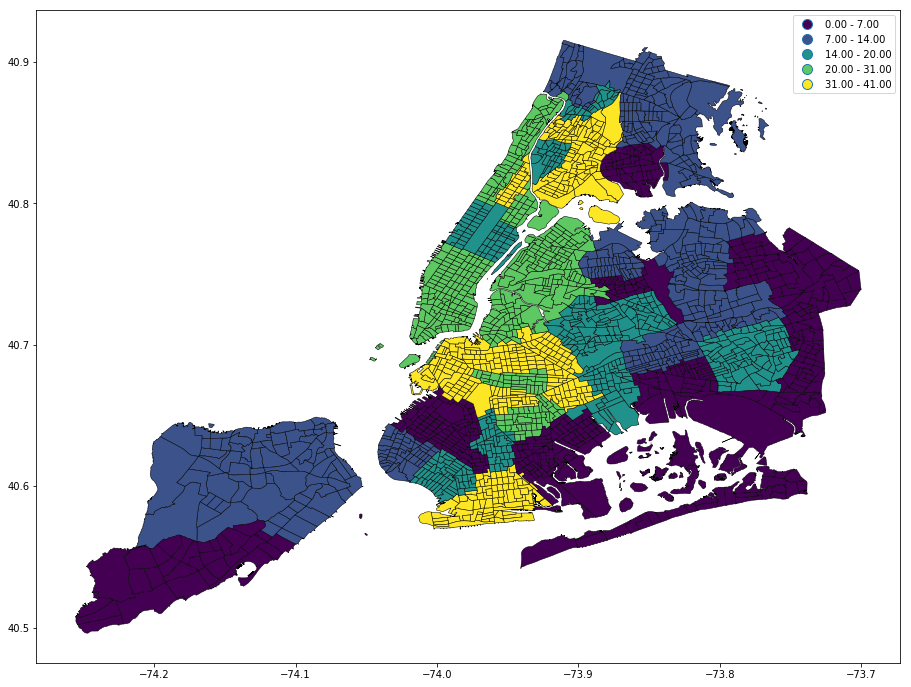

In [242]:
citylab_geo.plot(column = 'Change Median Person Income', figsize=(20,12), 
                 cmap='viridis',edgecolor = 'k', lw = 0.5,scheme='quantiles' ,legend=True)

Fig 4: The above figure shows the map of NYC with the colors of the census tracts indicating the change in % median personal income. The ones with the highest change in median personal income correlate with the gentrified neighborhoods

In [ ]:
citylab['Change Real Estate and Rental and Leasing']

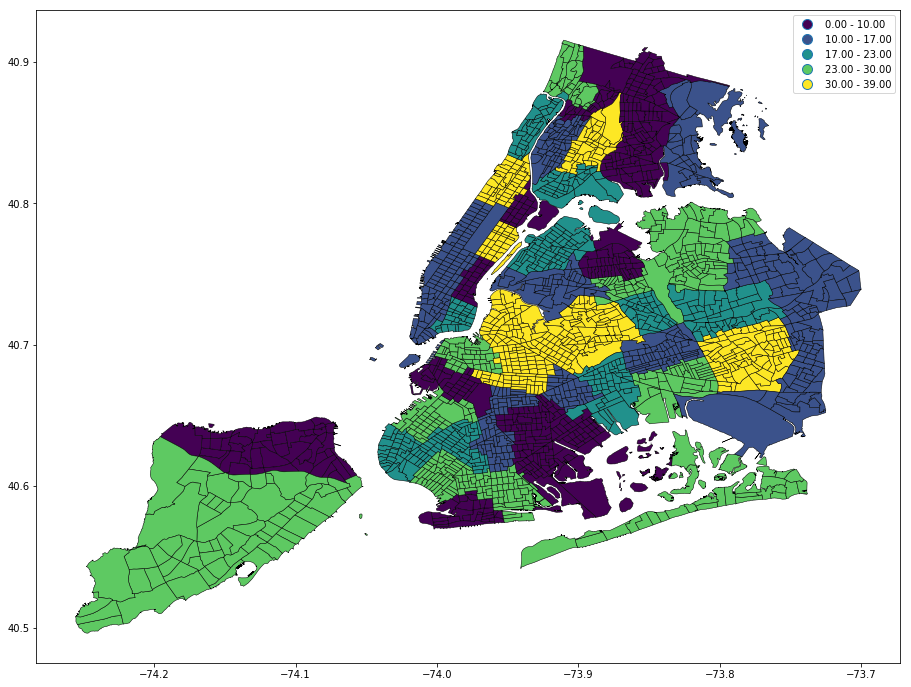

In [243]:
citylab_geo.plot(column = 'Change Real Estate and Rental and Leasing', figsize=(20,12), 
                 cmap='viridis',edgecolor = 'k', lw = 0.5,scheme='quantiles' ,legend=True)

Fig 5: The above figure shows the map of NYC with the colors of the census tracts indicating the change in % real estate rental and leasing prices. The ones with the highest change in correlate with the gentrified neighborhoods to a certain extent

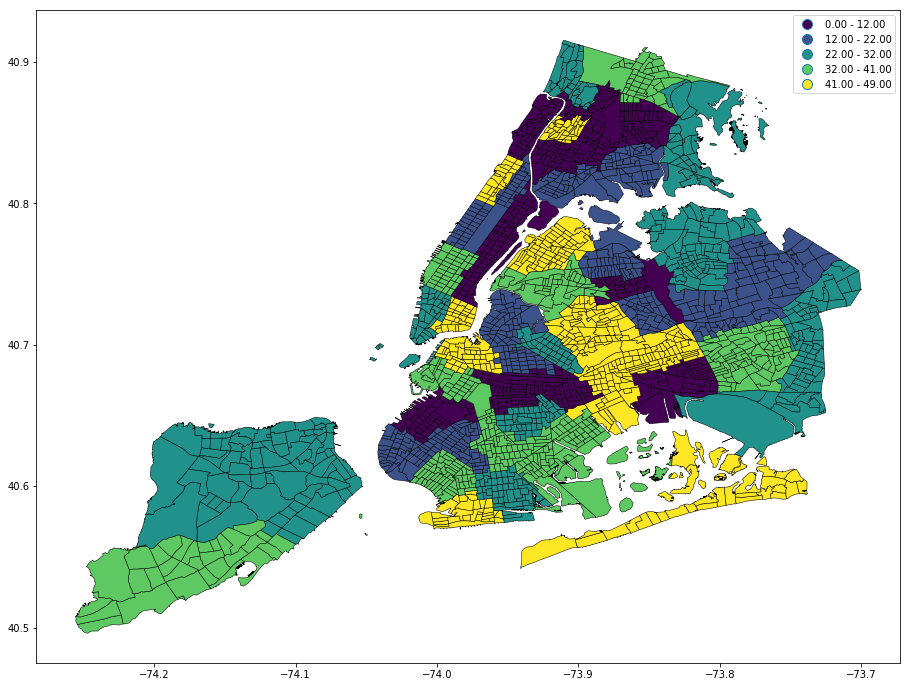

In [244]:
citylab_geo.plot(column = 'Change Bachelor\'s Degree or Higher (age 25+)', figsize=(20,12), 
                 cmap='viridis',edgecolor = 'k', lw = 0.5,scheme='quantiles' ,legend=True)

Fig 6: The above figure shows the map of NYC with the colors of the census tracts indicating the change in % number of people with a bachelors degree or more. The ones with the highest change in correlate with the gentrified neighborhoods in manhattan and brooklyn but not necessarily in the rest of the city

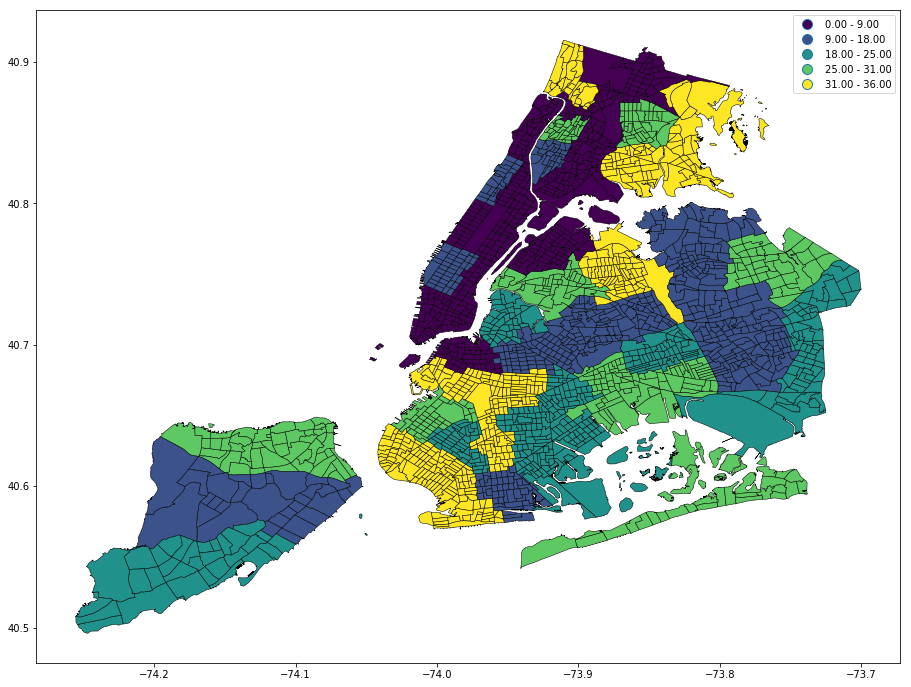

In [245]:
citylab_geo.plot(column = 'Change Standalone Retail', figsize=(20,12), 
                 cmap='viridis',edgecolor = 'k', lw = 0.5,scheme='quantiles' ,legend=True)

Fig 7: The above figure shows the map of NYC with the colors of the census tracts indicating the change in % of stand alone retail stores. The ones with the highest change in correlate with the gentrified neighborhoods to a certain extent